In [1]:
!pip install easyocr

     --------------------------------------- 70.8/70.8 MB 46.7 MB/s eta 0:00:00
     --------------------------------------- 35.0/35.0 MB 65.6 MB/s eta 0:00:00
     ---------------------------------------- 153.2/153.2 kB ? eta 0:00:00


In [3]:
!pip install imutils

  Preparing metadata (setup.py): started
  Preparing metadata (setup.py): finished with status 'done'
  Created wheel for imutils: filename=imutils-0.5.4-py3-none-any.whl size=25879 sha256=e631eaa25d8b10e709e4add11320a3015df720ef2f7292f760b02595525785ea
  Stored in directory: c:\users\hp\appdata\local\pip\cache\wheels\86\d7\0a\4923351ed1cec5d5e24c1eaf8905567b02a0343b24aa873df2
Successfully built imutils


In [16]:
from matplotlib import pyplot as plt
from imutils.perspective import four_point_transform
from imutils.contours import sort_contours
import imutils
from easyocr import Reader
import cv2
import requests
import numpy as np
from PIL import ImageFont, ImageDraw, Image

In [17]:
def plt_imshow(title='image', img=None, figsize=(8 ,5)):
    plt.figure(figsize=figsize)
 
    if type(img) == list:
        if type(title) == list:
            titles = title
        else:
            titles = []
 
            for i in range(len(img)):
                titles.append(title)
 
        for i in range(len(img)):
            if len(img[i].shape) <= 2:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_GRAY2RGB)
            else:
                rgbImg = cv2.cvtColor(img[i], cv2.COLOR_BGR2RGB)
 
            plt.subplot(1, len(img), i + 1), plt.imshow(rgbImg)
            plt.title(titles[i])
            plt.xticks([]), plt.yticks([])
 
        plt.show()
    else:
        if len(img.shape) < 3:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_GRAY2RGB)
        else:
            rgbImg = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
 
        plt.imshow(rgbImg)
        plt.title(title)
        plt.xticks([]), plt.yticks([])
        plt.show()
 
 
def make_scan_image(image, width, ksize=(5,5), min_threshold=75, max_threshold=200):
    image_list_title = []
    image_list = []
 
    image = imutils.resize(image, width=width)
    ratio = org_image.shape[1] / float(image.shape[1])
 
    # 이미지를 grayscale로 변환하고 blur를 적용
    # 모서리를 찾기위한 이미지 연산
    gray = cv2.cvtColor(image, cv2.COLOR_BGR2GRAY)
    blurred = cv2.GaussianBlur(gray, ksize, 0)
    edged = cv2.Canny(blurred, min_threshold, max_threshold)
 
    image_list_title = ['gray', 'blurred', 'edged']
    image_list = [gray, blurred, edged]
 
    # contours를 찾아 크기순으로 정렬
    cnts = cv2.findContours(edged.copy(), cv2.RETR_EXTERNAL, cv2.CHAIN_APPROX_SIMPLE)
    cnts = imutils.grab_contours(cnts)
    cnts = sorted(cnts, key=cv2.contourArea, reverse=True)
 
    findCnt = None
 
    # 정렬된 contours를 반복문으로 수행하며 4개의 꼭지점을 갖는 도형을 검출
    for c in cnts:
        peri = cv2.arcLength(c, True)
        approx = cv2.approxPolyDP(c, 0.02 * peri, True)

    plt_imshow(image_list_title, image_list)


In [18]:
putText(org_image, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
def putText(cv_img, text, x, y, color=(0, 0, 0), font_size=22):
    font = ImageFont.truetype('C:/Windows/Fonts/gulim.ttc', font_size)
    img = Image.fromarray(cv_img)
   
    draw = ImageDraw.Draw(img)
    draw.text((x, y), text, font=font, fill=color)
 
    cv_img = np.array(img)
  
    return cv_img

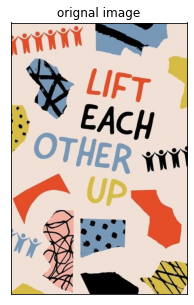

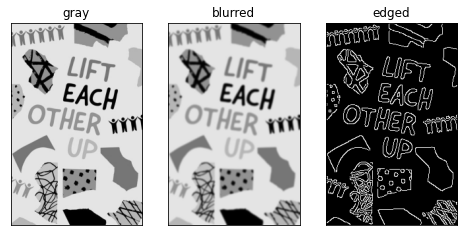

[INFO] OCR'ing input image...


In [30]:
path = './data/test.jpeg'

with open(path, 'rb') as f:
    data =f.read()

image_nparray = np.asarray(bytearray(data), dtype=np.uint8)
org_image = cv2.imdecode(image_nparray, cv2.IMREAD_COLOR) 
plt_imshow("orignal image", org_image)
 
box_image = make_scan_image(org_image, width=200, ksize=(5, 5), min_threshold=20, max_threshold=100)

langs = ['ko', 'en']
 
print("[INFO] OCR'ing input image...")
reader = Reader(lang_list=langs, gpu=True)
results = reader.readtext(org_image)

In [31]:
results

[([[172.95315215481958, 88.05494547078594],
   [334.5879811270839, 118.15911670308626],
   [315.0468478451804, 202.94505452921405],
   [153.41201887291612, 171.84088329691374]],
  'LIFT',
  0.9986940214957811),
 ([[159.860333073146, 168.05919750220144],
   [343.50853518058733, 195.74874049661386],
   [324.13966692685403, 285.94080249779853],
   [141.49146481941267, 258.2512595033861]],
  'EACH',
  0.9070349930498414),
 ([[55.01300624614166, 228.0443693321724],
   [296.84419119689284, 272.1551375972091],
   [274.9869937538583, 360.9556306678276],
   [34.15580880310714, 316.8448624027909]],
  'OTHER',
  0.44585081353566697),
 ([[170.86977832225475, 335.0712487458125],
   [279.8812732166237, 349.6542512170019],
   [266.1302216777452, 431.9287512541875],
   [157.11872678337627, 417.3457487829981]],
  'UP',
  0.973439717662293)]

In [32]:
# loop over the results
for (bbox, text, prob) in results:
    print("[INFO] {:.4f}: {}".format(prob, text))
  
    (tl, tr, br, bl) = bbox
    tl = (int(tl[0]), int(tl[1]))
    tr = (int(tr[0]), int(tr[1]))
    br = (int(br[0]), int(br[1]))
    bl = (int(bl[0]), int(bl[1]))
 
    # 추출한 영역에 사각형을 그리고 인식한 글자를 표기합니다.
    cv2.rectangle(org_image, tl, br, (0, 255, 0), 2)
    box_image = putText(org_image, text, tl[0], tl[1] - 60, (0, 255, 0), 50)
#     cv2.putText(box_image, text, (tl[0], tl[1] - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.8, (0, 255, 0), 2)

[INFO] 0.9987: LIFT
[INFO] 0.9070: EACH
[INFO] 0.4459: OTHER
[INFO] 0.9734: UP


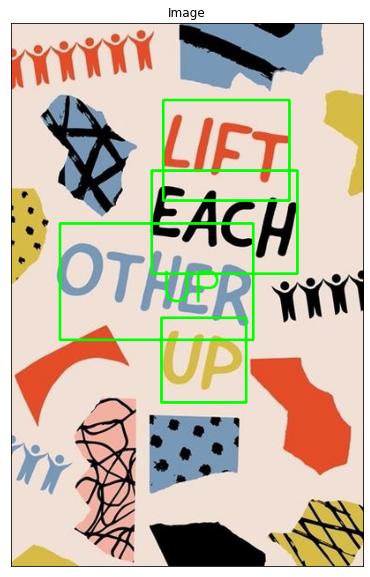

In [33]:
plt_imshow("Image", box_image, figsize=(16,10))